## Image Classification using Convolutional Neural Networks (CNN) on CIFAR-10 Dataset
### Problem Description
#### The goal of this assignment is to build a Convolutional Neural Network (CNN) for image classification using a subset of the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. For this assignment, you will be provided with a subset of the CIFAR-10 dataset consisting of 1,000 images for training and 200 images for testing.

### Objectives
#### Understand the structure and components of CNNs.
#### Implement a CNN using PyTorch to classify images from the CIFAR-10 subset.
#### Train the CNN on the provided training data and evaluate its performance on the test data.

### Input
#### CIFAR-10 Subset: The dataset contains images categorized into the following 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.
#### Training Data: 1,000 images
#### Testing Data: 200 images
#### Model Architecture: You will design and implement a CNN model. You may use standard layers like convolutional layers, pooling layers, fully connected layers, etc.

In [1]:
# Import the required Libraries
import numpy as np
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
#import torchmetrics
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [3]:
# Define a custom dataset class
class CustomCIFAR10Dataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, label = self.data[idx], self.labels[idx]
        img = img.transpose((1, 2, 0))  # Convert to HWC format
        if self.transform:
            img = self.transform(img)
        return img, label

In [4]:
# Load the saved CIFAR10 data subsets using PyTorch
train_subset_data = np.load('data/train_subset_data.npy')
train_subset_labels = np.load('data/train_subset_labels.npy')
test_subset_data = np.load('data/test_subset_data.npy')
test_subset_labels = np.load('data/test_subset_labels.npy')

# Create an instance of the CustomCIFAR10Dataset for the training subset,
# using the provided training data and labels, and apply the specified transformations.
train_dataset = CustomCIFAR10Dataset(train_subset_data, train_subset_labels, transform=transform)

# Create an instance of the CustomCIFAR10Dataset for the test subset,
# using the provided test data and labels, and apply the specified transformations.
# hint: test_dataset = <>
### BEGIN SOLUTION
test_dataset = CustomCIFAR10Dataset(test_subset_data, test_subset_labels, transform=transform)
### END SOLUTION

# Create a DataLoader for the training dataset with a batch size of 4 and shuffling enabled.
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Create a DataLoader for the test dataset with a batch size of 4 and shuffling disabled.
# hint: test_loader = <>
### BEGIN SOLUTION
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
### END SOLUTION

# Print some information about the subsets
print(f'Train Size: {len(train_dataset)}')
print(f'Test Size: {len(test_dataset)}')

Train Size: 1000
Test Size: 200


In [5]:
### BEGIN HIDDEN TESTS

# Check if test_dataset is an instance of CustomCIFAR10Dataset
assert isinstance(test_dataset, CustomCIFAR10Dataset), "test_dataset should be an instance of CustomCIFAR10Dataset"

# Check if the length of the dataset matches the number of labels
assert len(test_dataset) == len(test_subset_labels), "Length of test_dataset should match the length of test_subset_labels"

### END HIDDEN TESTS

In [6]:
### BEGIN HIDDEN TESTS

# Check if test_loader is an instance of DataLoader
assert isinstance(test_loader, DataLoader), "test_loader should be an instance of DataLoader"

# Check if the batch_size is correctly set
assert test_loader.batch_size == 4, "Batch size of test_loader should be 4"

### END HIDDEN TESTS

In [7]:
# Define the list of class names corresponding to the CIFAR-10 dataset labels.
# hint1: Check the problem description and the input at the beginning of this Notebook
# hint2: classes = ['airplane', 'automobile'..........................,'ship', 'truck']

### BEGIN SOLUTION
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
### END SOLUTION

In [8]:
### BEGIN HIDDEN TESTS

# Check if classes is a list
assert isinstance(classes, list), "classes should be a list"

# Check if the length of classes is 10
assert len(classes) == 10, "classes should contain exactly 10 elements"

# Check if the content of classes matches the expected class names
expected_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
assert classes == expected_classes, "classes does not match the expected class names"

### END HIDDEN TESTS

In [9]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.58143103..1.757044].


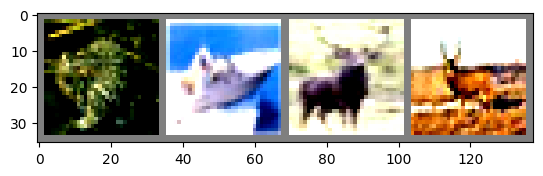

frog  ship  deer  deer 


In [10]:
# Get some random training images for display

# Create an iterator from the training data loader
train_dataiter = iter(train_loader)
# Get the next batch of images and labels from the iterator
images, labels = next(train_dataiter)  

# Show images
# Display the images in a grid using the imshow function
imshow(torchvision.utils.make_grid(images))  

# Print labels
# Print the labels of the images in the batch
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
### BEGIN HIDDEN TESTS
# DEFINE HERE AND USE MULTIPLE PLACES IN FUTURE HIDDEN TESTS
import re
def check_method_order(method_names):
    # Retrieve the previous cell's content
    code_string = In[-2]
    # print(code_string)
    method_call_patterns = [
        fr'{method_name.split("(")[0]}\s*\(\s*.*?\s*\)'
        for method_name in method_names
    ]

    # Find all occurrences of the patterns
    occurrences = []
    for pattern in method_call_patterns:
        match = re.search(pattern, code_string)
        if match:
            occurrences.append((match.start(), pattern))
   
    # Check if occurrences are in the correct order
    occurrences.sort()  # Sort by the starting position of the matches
    sorted_patterns = [pattern for _, pattern in occurrences]
   
    return sorted_patterns == method_call_patterns
### END HIDDEN TESTS

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71453285..1.8768656].


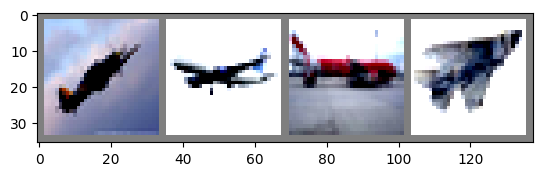

airplane airplane airplane airplane


In [12]:
# Get some random test images for display
# Step1: Create an iterator from the test data loader
# Step2: Get the next batch of images and labels from the iterator
# Step3: Display the images in a grid using the imshow function
# Step4: Print the labels of the images in the batch
# hint: Refer the code in the above cell that displays training images

### BEGIN SOLUTION
test_dataiter = iter(test_loader)
images, labels = next(test_dataiter)  
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
### END SOLUTION

In [13]:
### BEGIN HIDDEN TESTS
import collections.abc
# Check if test_dataiter is an iterator
assert isinstance(test_dataiter, collections.abc.Iterator), "test_dataiter should be an iterator"

methods = [
    "iter",
    "next",
    "make_grid" 
]
result = check_method_order(methods)
print(result)
assert result == True
### END HIDDEN TESTS

True


### Design the following Convolutional Neural Network architecture for Image Processing
### and Classification, apply the Pooling and Activation functions as per the below design

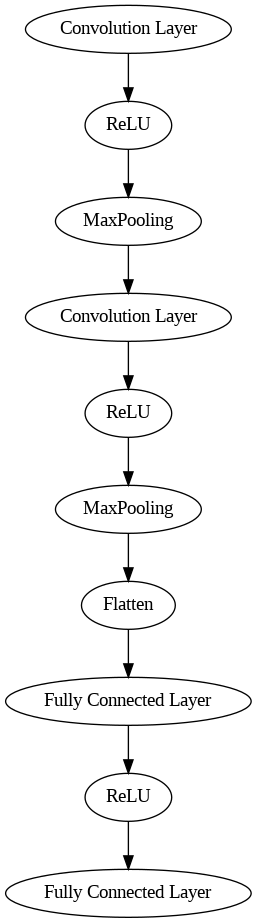

In [14]:
# Define a simple convolutional neural network (CNN) class

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer: input channels = 3 (RGB), output channels = 32, 
        #                            3x3 kernel, stride=1, padding=1
        # Second convolutional layer: input channels = 32, output channels = 64,
        #                             3x3 kernel, stride=1, padding=1
        # Max pooling layer: 2x2 kernel with stride = 2
        # First fully connected layer: input features = 64 * 8 * 8, output features = 512
        # Second fully connected layer: input features = 512, output features = 10 (number of classes)
        # hint: Use Class variables, e.g self.conv1, self.pool, self.fc1
        ### BEGIN SOLUTION
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)
        ### END SOLUTION
    def forward(self, x):
        # Apply the first convolutional layer, followed by ReLU activation and max pooling
        # Apply the second convolutional layer, followed by ReLU activation and max pooling
        # Flatten the tensor into a 1D vector (except for the batch dimension)
        # Apply the first fully connected layer, followed by ReLU activation
        # Apply the second fully connected layer (output layer)
        # hint: No softmax here, logits are used
        ### BEGIN SOLUTION
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        ### END SOLUTION
        return x
    

In [15]:
# Initialize the model
# This line creates an instance of the SimpleCNN class defined earlier.
model = SimpleCNN()

In [16]:
# CHECK NETWORK ARCHITECTURE AND PARAMETERS

### BEGIN HIDDEN TESTS
# List to store the layers
layers = list(model.modules())

# Assertions to check the network architecture
# Conv1
assert isinstance(layers[1], nn.Conv2d), "First layer is not Conv2d"
assert layers[1].in_channels == 3, "Conv1 in_channels should be 3"

# Conv2
assert isinstance(layers[2], nn.Conv2d), "Second layer is not Conv2d"
assert layers[2].out_channels == 64, "Conv2 out_channels should be 64"

# Pool
assert isinstance(layers[3], nn.MaxPool2d), "Third layer is not MaxPool2d"
assert layers[3].kernel_size == 2, "Pool kernel_size should be (2, 2)"
assert layers[3].stride == 2, "Pool stride should be (2, 2)"

# FC1
assert isinstance(layers[4], nn.Linear), "Fourth layer is not Linear"
assert layers[4].in_features == 64 * 8 * 8, "FC1 in_features should be 64 * 8 * 8"
assert layers[4].out_features == 512, "FC1 out_features should be 512"

# FC2
assert isinstance(layers[5], nn.Linear), "Fifth layer is not Linear"
assert layers[5].in_features == 512, "FC2 in_features should be 512"
assert layers[5].out_features == 10, "FC2 out_features should be 10"

### END HIDDEN TESTS

In [17]:
### BEGIN HIDDEN TESTS

class Hook:
    def __init__(self):
        self.operations = []

    def hook_fn(self, module, input, output):
        self.operations.append(type(module))

    def capture_relu(self, module, input, output):
        self.operations.append('ReLU')

def test_transformations():
    model_test = SimpleCNN()
    hook = Hook()

    # Register hooks for all submodules
    hooks = []
    for submodule in model_test.modules():
        if isinstance(submodule, (nn.Conv2d, nn.MaxPool2d, nn.Linear)):
            hooks.append(submodule.register_forward_hook(hook.hook_fn))
    
    # Register hooks for ReLU activations explicitly
    layers = list(model_test.modules())
    relu_hooks = []
    for layer in [layers[1], layers[2], layers[4]]:
        relu_hooks.append(layer.register_forward_hook(hook.capture_relu))

    try:
        # Forward pass with random input
        x = torch.randn(1, 3, 32, 32)  # Example input
        model_test(x)

        # Expected sequence of operations
        expected_operations = [
            nn.Conv2d,  'ReLU', nn.MaxPool2d, nn.Conv2d, 'ReLU', nn.MaxPool2d,
            nn.Linear, 'ReLU', nn.Linear
        ]

        assert hook.operations == expected_operations, f"Expected {expected_operations} but got {hook.operations}"

    finally:
        # Clean up hooks
        for h in hooks + relu_hooks:
            h.remove()

# Run the test
test_transformations()

### END HIDDEN TESTS

In [18]:
# Set loss function and optimizer

# Create and initialize the loss function to CrossEntropyLoss
# This loss function is suitable for multi-class classification problems
### BEGIN SOLUTION
criterion = nn.CrossEntropyLoss()
### END SOLUTION

# Create and initialize the optimizer to Adam optimizer
# The learning rate (lr) is set to 0.001, which controls the step size for updating the model parameters
### BEGIN SOLUTION
optimizer = optim.Adam(model.parameters(), lr=0.001)
### END SOLUTION

In [19]:
### BEGIN HIDDEN TESTS

# Function to check if an instance of a specific class exists in the local scope and 
# if its attributes are set correctly
def assert_instance_in_scope(class_type, attribute_checks, scope, error_message):
    instance_found = False
    for var_value in scope.values():
        if isinstance(var_value, class_type):
            instance_found = True
            for attr, expected_value in attribute_checks.items():
                actual_value = eval(f"var_value.{attr}")
                assert actual_value == expected_value, f"{class_type.__name__} {attr} is {actual_value}, expected {expected_value}"
            break
    assert instance_found, error_message

# Get all variables in the current local scope
local_vars = locals()

# Assert that there is an instance of nn.CrossEntropyLoss in the local scope
assert_instance_in_scope(nn.CrossEntropyLoss, {}, local_vars, "No instance of nn.CrossEntropyLoss found")

# Assert that there is an instance of optim.Adam in the local scope and the learning rate is set correctly
assert_instance_in_scope(optim.Adam, {'param_groups[0]["lr"]': 0.001}, local_vars, "No instance of optim.Adam with correct learning rate found")
### END HIDDEN TESTS

In [20]:
# Training function
# hint1: train(model, train_loader, <loss_function_obj>, <optimizer_obj>, num_epochs=2)
# hint2: replace criterion and optimizer with your <loss_function_obj> and <optimizer_obj> respectively
def train(model, train_loader, criterion, optimizer, num_epochs=2):    
    # Set the model to training mode
    # This is important for certain layers like dropout and batch normalization, 
    #                     which behave differently during training and evaluation
    model.train()
    for epoch in range(num_epochs):
        # Initialize the running loss to zero before starting the training loop
        # Loop over the training data in batches
        #    Zero the gradients for the optimizer
        #    Forward pass: compute the model output for the given inputs
        #    Compute the loss between the predicted outputs and the actual labels
        #    Backward pass: compute the gradient of the loss with respect to model parameters
        #    Perform a single optimization step to update the model parameters
        #    Accumulate the loss for reporting
        #    Print the average loss for every <n> mini-batches
        ### BEGIN SOLUTION
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if i % 100 == 99:  # print every 100 mini-batches
                print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
        ### END SOLUTION        
    print('Finished Training')

In [21]:
### BEGIN HIDDEN TESTS

methods = [
    "zero_grad",
    "model",
    "backward",
    "step"
   
]
result = check_method_order(methods)
print(result)
assert result == True
### END HIDDEN TESTS

True


In [22]:
# Train the model
num_epochs = 2
# Invoke the train function to kick off the learning
# Pass arguments: model, loader, loss, optimizer, num of epochs
# hint: train(model, train_loader, <loss_function_obj>, <optimizer_obj>, num_epochs)
### BEGIN SOLUTION
train(model, train_loader, criterion, optimizer, num_epochs)
### END SOLUTION

[NVSHARE][WARN]: Couldn't open file /var/run/secrets/kubernetes.io/serviceaccount/namespace to read Pod namespace
[NVSHARE][INFO]: Successfully initialized nvshare GPU
[NVSHARE][INFO]: Client ID = 65b1d894b2f44c10


[Epoch 1, Batch 100] loss: 2.241
[Epoch 1, Batch 200] loss: 2.071
[Epoch 2, Batch 100] loss: 1.752
[Epoch 2, Batch 200] loss: 1.691
Finished Training


In [23]:
### BEGIN HIDDEN TESTS

methods = [
    "train"
   
]
result = check_method_order(methods)
print(result)
assert result == True

### END HIDDEN TESTS

True


In [24]:
# Evaluation function using torchmetrics
def evaluate(model, test_loader, criterion):
    model.eval()
    accuracy_metric = torchmetrics.Accuracy(task="multiclass", num_classes=10)  
    test_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            accuracy_metric.update(predicted, labels)

    accuracy = accuracy_metric.compute().item()
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Test Loss: {test_loss / len(test_loader):.3f}')

In [25]:
# evaluate the model
evaluate(model, test_loader, criterion)

NameError: name 'torchmetrics' is not defined